<a href="https://colab.research.google.com/github/AlmaRosa13/Ecuaciones_Diferenciales/blob/main/Sol_Ecs_Dif_DiferentesOrdenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solución de Ecuaciones diferenciales de primer orden**

$dy/dx=x^2(1+y)$

con condición inicial $y(0)=3$. \\

Solución exacta:

$y=4e^{x^3/3}-1$

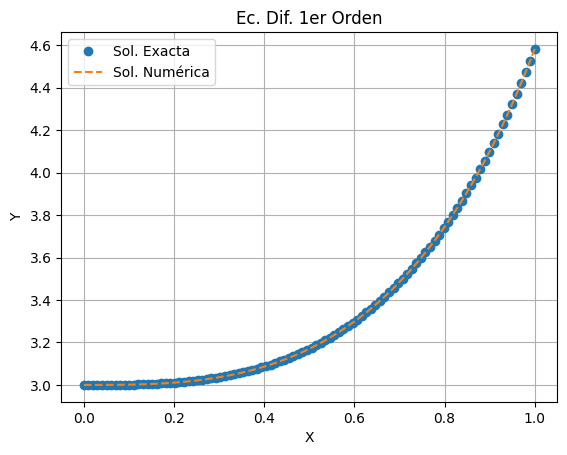

In [ ]:
import numpy as np #Libreria para dar sentido matemático
import matplotlib.pyplot as plt #Libreria que permite ver gáficos
from scipy import integrate #Permite resolver integrales

def f(y,x):
  return (x**2)*(1+y)  #Definición de Función numérica

def ex(x):
  return 4*(np.exp(x**3/3))-1  #Definición de Función exacta

#Condición incial
y0=3.0
x=np.linspace(0,1,100) #intervalo donde se obtiene la solución

sol=integrate.odeint(f,y0,x) #odeint resuelve las integrales ordinarias de 1er orden
#print(sol)

# Configuración del gráfico
fig, axes=plt.subplots()
axes.plot(x,ex(x),'o')
axes.plot(x,sol,'--')

plt.title('Ec. Dif. 1er Orden')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Sol. Exacta','Sol. Numérica'])
plt.grid( True )
plt.show()

In [ ]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    """Esta función dibuja el campo de dirección de una EDO"""

    f_np = sympy.lambdify((x, y_x), f_xy, modules='numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)

    ax.axis('tight')
    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)

    return ax

***Gráfico de campos de direcciones***

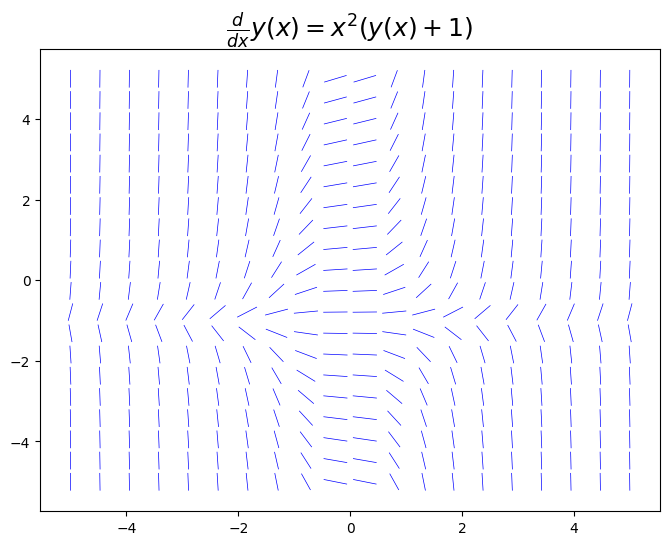

In [ ]:
import sympy
# Defino incognitas
x = sympy.symbols('x')
y = sympy.Function('y')

# Defino la función
f = (x**2)*(1+y(x))

# grafico de campo de dirección
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
campo_dir = plot_direction_field(x, y(x), f, ax=axes)

# **Ecuaciones diferenciales de segundo orden**

Nota.- Python es capaz solo de resolver ecuaciones diferenciales de primer orden o sistemas de ecuaciones diferenciales de primer orden. Por tal razón, si se desea resolver ecuaciones de 2do orden o de orden superior es necesario reducir a un sistema de ecuaciones de 1er orden.

# **Ejemplo.-** Vibraciones libres con amortiguamiento viscoso (Mecánica de vibraciones pag. 62 Mecánica de las vibraciones J.P. DEN HARTOG)

Ecuación diferencial de segundo orden a resolver

$x''+kx/m+bx'/m =0$

Es un oscilador armonico simple (los 2 primeros términos) y una amortiguación (3er término).  

Por tanto, la solución de está ecuación diferencial para la posición, nos dará un movimiento que irá variando su amplitud hasta que tiene de a ser estático o una amplitud muy pequeña.

A través de la siguiente relación, se convierte en un sistema de ecuaciones diferenciales de primer orden

$x''=y'$ #Se toma la máxima derivada y se iguala a una de 1er orden (Sentido fisico "$y'$" es la derivada de la velocidad y se integra ambos lados obtenemos que:)

$x'=y$ #La derivada de la posición "$x'$" es igual a la velocidad.


Sustituyendo en la ecuación original obtenos que:

$y'=-kx/m -by/m$  Sistema de Ecuación diferencial de primer orden

$x'=y$

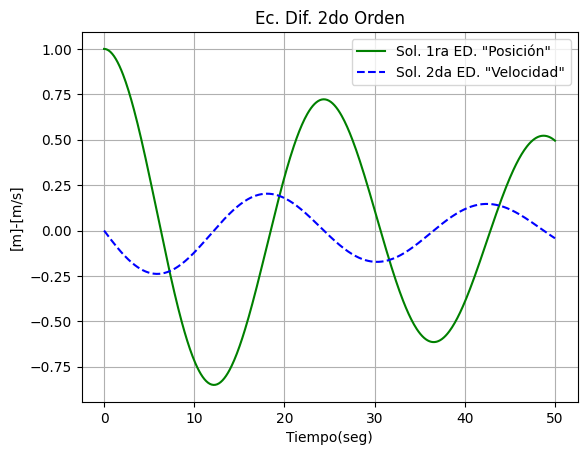

In [ ]:
import numpy as np #Libreria para dar sentido matemático
import matplotlib.pyplot as plt #Libreria que permite ver gáficos
from scipy import integrate #Permite resolver integrales

#Declarar las constantes
k=1.0
m=5.0
b=0.4

def f(v,t):  #Variables a resolver x,y y la v.i. es t
  x,y=v
  return [y,-(k/m)*x - (b/m)*y]  #Devuelve una lista, para los valores y y y'


#Condición incial
f0=[1.0,0.0]  #(posición, velocidad)
t=np.linspace(0,50,500) #intervalo de tiempo donde se obtiene la solución

sol=integrate.odeint(f,f0,t) #odeint resuelve las integrales ordinarias de 1er orden
#print(sol)  #Imprime la(posición, velocidad)

# Configuración del gráfico
fig, axes=plt.subplots()
axes.plot(t,sol[:,0],'g') #1ra ec. dif., todas la fila de la columna cero
axes.plot(t,sol[:,1],'--b') #todas las filas pero de la columna 1

plt.title('Ec. Dif. 2do Orden')
plt.xlabel('Tiempo(seg)')
plt.ylabel('[m]-[m/s]')
plt.legend(['Sol. 1ra ED. "Posición"','Sol. 2da ED. "Velocidad"'])
plt.grid( True )
plt.show()

# **Resolviendo EDO en Python/SymPy**

*SymPy* nos proporciona un solucionador genérico de Ecuaciones diferenciales ordinarias, sympy.dsolve, el cual es capaz de encontrar soluciones analíticas a muchas EDOs elementales.

La sintaxis más básica es: *dsolve(eq,f)*



*   Siendo eq una expresión de la clase Equality (clase propia de sympy), o bien, una expresión que se asume está igualada a cero. En ambos casos, se considera que este argumento contiene la descripció de la EDO.
*   f es la función con respecto a la cual se resuelve la ec. dif.; y en general, es un objeto de la clase Function (clase propia de sympy).



Mientras ***sympy.dsolve*** se puede utilizar para resolver muchas EDOs sencillas simbólicamente, como veremos a continuación, debemos tener en cuenta que la mayoría de las EDOs no se pueden resolver analíticamente. Por ejemplo, resolver analíticamente la siguiente ecuación diferencial, y veamos si llegamos al mismo resultado utilizando symPy para solucionar la siguiente Ecuación diferencial ordinaria:


$dy/dx=−3x^2y+6x^2$

In [ ]:
# Importando modulos necesarios
import sympy
init_printing() # imprimir con notación matemática.

# Defino las incognitas
x = symbols('x')
y = Function('y')

# Resolviendo ecuación diferencial
ed=Eq(y(x).diff(x)+3*x**2*y(x),6*x**2) #forma de escribir una derivada .diff(),
# pero si se quiere una de diferente grado es necesario poner .diff(variable
#a derivar, grado)
#Formar la ecuación se usa Eq de la paqueteria Equality

sol=dsolve(ed,y(x))
sol

             3    
           -x     
y(x) = C₁⋅ℯ    + 2

In [ ]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    """Esta función dibuja el campo de dirección de una EDO"""

    f_np = sympy.lambdify((x, y_x), f_xy, modules='numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)

    ax.axis('tight')
    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)

    return ax

***Gráfico de campos de direcciones***

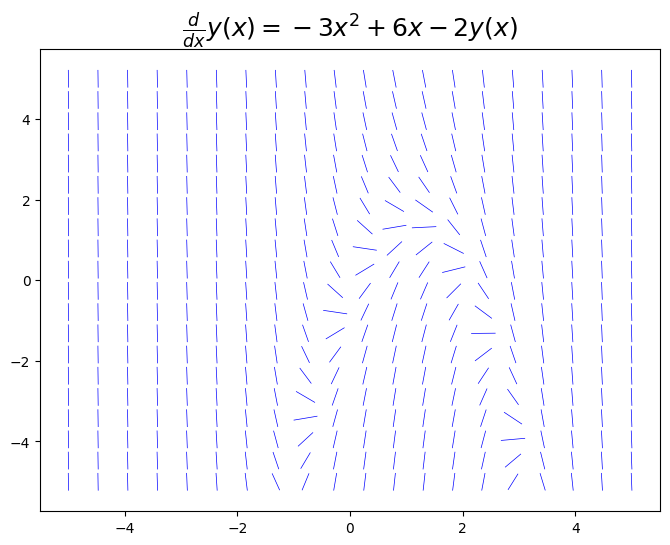

In [ ]:
# Defino incognitas
x = sympy.symbols('x')
y = sympy.Function('y')

# Defino la función
f = -3*x**2 - 2*y(x) + 6*x

# grafico de campo de dirección
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
campo_dir = plot_direction_field(x, y(x), f, ax=axes)

Solución Particular

In [ ]:
# Importando modulos necesarios
from sympy import *
init_printing() # imprimir con notación matemática.

# Defino las incognitas
x = symbols('x')
y = Function('y')
f=-3*x**2*y(x)+6*x**2
# Resolviendo ecuación diferencial
ed=Eq(y(x).diff(x),f) #forma de escribir una derivada .diff(), pero si se quiere una de
# diferente grado es necesario poner .diff(variable a derivar, grado)
#Formar la ecuación se usa Eq de la paqueteria Equality
CI={y(0):3}

ed_sol=dsolve(ed,y(x),ics=CI)
ed_sol

              3
            -x 
y(x) = 2 + ℯ   

Gráfica

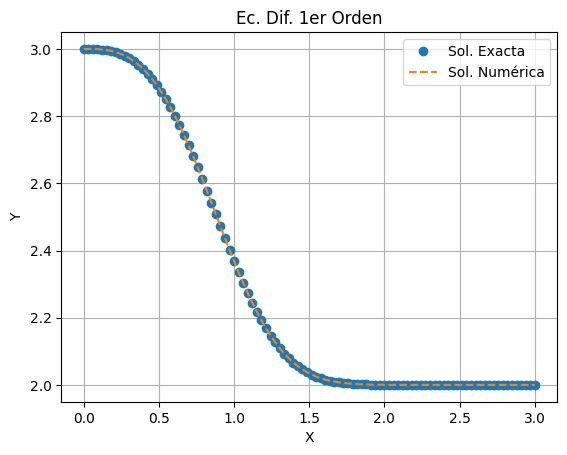

In [ ]:
import numpy as np #Libreria para dar sentido matemático
import matplotlib.pyplot as plt #Libreria que permite ver gáficos
from scipy import integrate #Permite resolver integrales

def f(y,x):
  return -3*x**2*y+6*x**2  #Definición de Función numérica

def ex(x):
  return 2+np.exp(-x**3)  #Definición de Función exacta

y0=3.0                  #Condición incial
x=np.linspace(0,3,100) #intervalo donde se obtiene la solución

sol=integrate.odeint(f,y0,x) #odeint resuelve las integrales ordinarias de 1er orden
#print(sol)

# Configuración del gráfico
fig, axes=plt.subplots()
axes.plot(x,ex(x),'o')
axes.plot(x,sol,'--')

plt.title('Ec. Dif. 1er Orden')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Sol. Exacta','Sol. Numérica'])
plt.grid( True )
plt.show()

# **Ejemplo.-**

## ***Problemas de valor incial de 1er orden***

Cuando necesitamos resolver un problema de valor inicial, podemos utilizar *dsolve* con un argumento adicional.

$dsolve(eq,f,ics=CI)$

Hay que tener cierta precaución, porque en este caso estamos pasando un keyword argument, en lugar de un argumento posicional.

$CI$ será un diccionario de la forma:

${f(x0):f1,f(x).diff(x).subs(x,x0):f2,...}$

Dependiendo, obviamente, del orden de la EDO.

Resolver el siguiente problema de valor inicial:

$y'+3y=6t+5; y(0)=3$

In [ ]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    """Esta función dibuja el campo de dirección de una EDO"""

    f_np = sympy.lambdify((x, y_x), f_xy, modules='numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)

    ax.axis('tight')
    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)

    return ax

In [ ]:
# Importando modulos necesarios
import sympy
init_printing() # imprimir con notación matemática.

# Defino las incognitas
t = symbols('t')
y = Function('y')

# Resolviendo ecuación diferencial
ed=Eq(y(t).diff() + 3*y(t), 6*t + 5) #forma de escribir una derivada .diff(), pero si se quiere una de
# diferente grado es necesario poner .diff(variable a derivar, grado)
#Formar la ecuación se usa Eq de la paqueteria Equality
CI={y(0):3}

sol=simplify(dsolve(ed,y(t),ics=CI))
sol

                    -3⋅t
y(t) = 2⋅t + 1 + 2⋅ℯ    

***Gráfico de campos de direcciones***

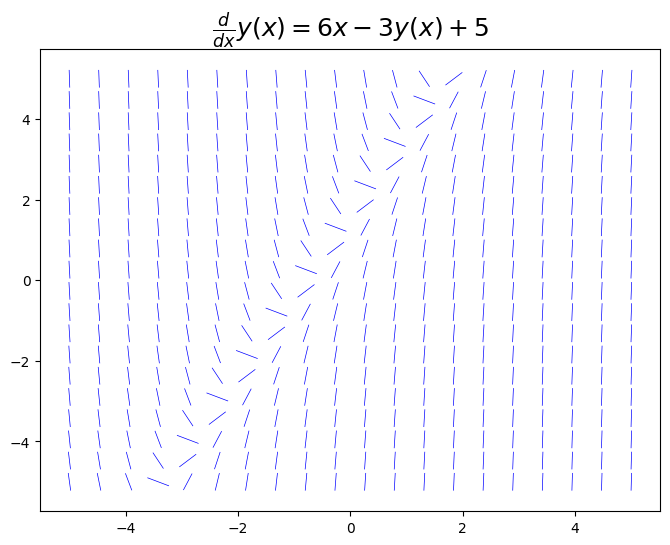

In [ ]:
# Defino incognitas
x = sympy.symbols('x')
y = sympy.Function('y')

# Defino la función
f = -3*y(x) + 6*x + 5

# Gráfico de campo de dirección
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
campo_dir = plot_direction_field(x, y(x), f, ax=axes)

# **Ejemplo.-**

## ***Problemas de valor incial de 2do orden***

# **Ejemplo.-**
Resolver la siguiente ecuación diferencial:
$4y''+12y'+9y=0$

In [ ]:
# Importando modulos necesarios
from sympy import *
init_printing() # imprimir con notación matemática.

# Defino las incognitas
x = symbols('x')
y = Function('y')

# Resolviendo ecuación diferencial
ed=Eq(4*y(x).diff(x,2) + 12*y(x).diff() + 9*y(x),0) #forma de escribir una derivada .diff(), pero si se quiere una de
# diferente grado es necesario poner .diff(variable a derivar, grado)
#Formar la ecuación se usa Eq de la paqueteria Equality
ed=dsolve(ed,y(x))
ed

                    -3⋅x 
                    ─────
                      2  
y(x) = (C₁ + C₂⋅x)⋅ℯ     

In [ ]:
# Importando modulos necesarios
from sympy import *
init_printing() # imprimir con notación matemática.

# Defino las incognitas
x = symbols('x')
y = Function('y')

# Resolviendo ecuación diferencial
ed=Eq(4*y(x).diff(x,2) + 12*y(x).diff() + 9*y(x),0) #forma de escribir una derivada .diff(), pero si se quiere una de
# diferente grado es necesario poner .diff(variable a derivar, grado)
#Formar la ecuación se usa Eq de la paqueteria Equality
CI={y(0):1, y(x).diff().subs(x,0):0}

dsolve(ed,y(x),ics=CI)

                  -3⋅x 
                  ─────
       ⎛3⋅x    ⎞    2  
y(x) = ⎜─── + 1⎟⋅ℯ     
       ⎝ 2     ⎠       

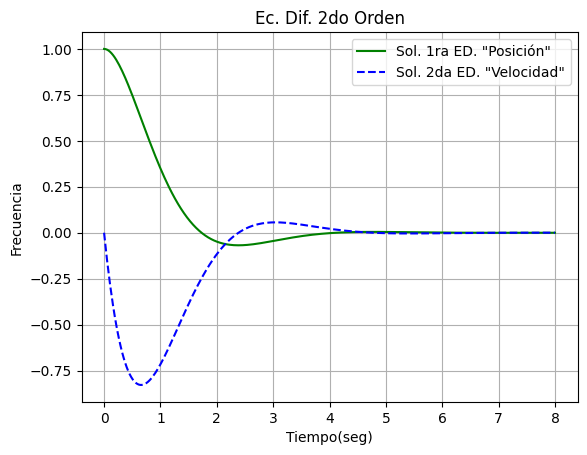

In [ ]:
import numpy as np #Libreria para dar sentido matemático
import matplotlib.pyplot as plt #Libreria que permite ver gáficos
from scipy import integrate #Permite resolver integrales

def f(v,t):  #Variables a resolver x,y y la v.i. es t
  x,y=v
  return [y,(-12*x-9*y)/4]  #Devuelve una lista, para los valores y y y'

#Condición incial
f0=[1.0,0.0]  #(posición, velocidad)
t=np.linspace(0,8,300) #intervalo de tiempo donde se obtiene la solución

sol=integrate.odeint(f,f0,t) #odeint resuelve las integrales ordinarias de 1er orden
#print(sol)  #Imprime la(posición, velocidad)

# Configuración del gráfico
fig, axes=plt.subplots()
axes.plot(t,sol[:,0],'g') #1ra ec. dif., todas la fila de la columna cero
axes.plot(t,sol[:,1],'--b') #todas las filas pero de la columna 1

plt.title('Ec. Dif. 2do Orden')
plt.xlabel('Tiempo(seg)')
plt.ylabel('Frecuencia')
plt.legend(['Sol. 1ra ED. "Posición"','Sol. 2da ED. "Velocidad"'])
plt.grid( True )
plt.show()

# **Ejemplo.-**
Resolver el siguiente problema de valor inicial:

$y''+y'-6y=0; y(0)=1; y'(0)=0$

In [ ]:
# Importando modulos necesarios
from sympy import *
init_printing() # imprimir con notación matemática.

# Defino las incognitas
x = symbols('x')
y = Function('y')

# Resolviendo ecuación diferencial
ed=Eq(y(x).diff(x,2) + y(x).diff(x)-6*y(x),0) #forma de escribir una derivada .diff(), pero si se quiere una de
# diferente grado es necesario poner .diff(variable a derivar, grado)
#Formar la ecuación se usa Eq de la paqueteria Equality
CI={y(0):1, y(x).diff().subs(x,0):0}

dsolve(ed,y(x),ics=CI)

          2⋅x      -3⋅x
       3⋅ℯ      2⋅ℯ    
y(x) = ────── + ───────
         5         5   

Solución particular para la C.I. $y(0)=1, y'(0)=0$

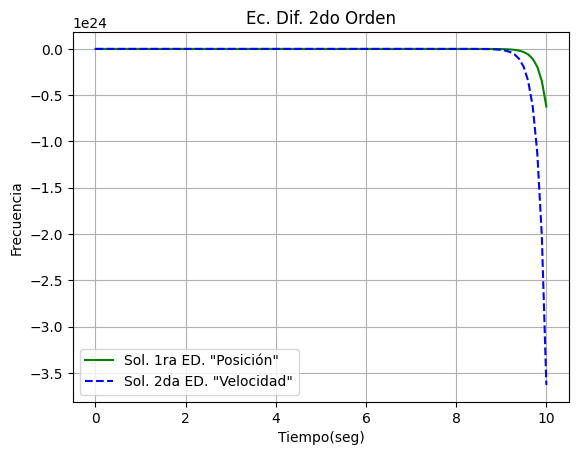

In [ ]:
import numpy as np #Libreria para dar sentido matemático
import matplotlib.pyplot as plt #Libreria que permite ver gáficos
from scipy import integrate #Permite resolver integrales

def f(v,t):  #Variables a resolver x,y y la v.i. es t
  x,y=v
  return [y,6*y-x]  #Devuelve una lista, para los valores y y y'

#Condición incial
f0=[1.0,0.0]  #(posición, velocidad)
t=np.linspace(0,10,100) #intervalo de tiempo donde se obtiene la solución

sol=integrate.odeint(f,f0,t) #odeint resuelve las integrales ordinarias de 1er orden
#print(sol)  #Imprime la(posición, velocidad)

# Configuración del gráfico
fig, axes=plt.subplots()
axes.plot(t,sol[:,0],'g') #1ra ec. dif., todas la fila de la columna cero
axes.plot(t,sol[:,1],'--b') #todas las filas pero de la columna 1

plt.title('Ec. Dif. 2do Orden')
plt.xlabel('Tiempo(seg)')
plt.ylabel('Frecuencia')
plt.legend(['Sol. 1ra ED. "Posición"','Sol. 2da ED. "Velocidad"'])
plt.grid( True )
plt.show()

# **Ejemplo.-**
Resolver la siguiente ecuación diferencial:

$dy/dx=1/2(y^2-1)$

que cumpla con la condición inicial $y(0)=2$, debemos realizar el siguiente procedimiento:

In [ ]:
# definiendo la ecuación
eq = 1/2*(y(x)**2 -1)

# Condición inicial
ics = {y(0): 2}

# Resolviendo la ecuación
edo= sympy.Eq(y(x).diff(x), eq)

edo_sol=sympy.dsolve(y(x).diff(x) - eq)
edo_sol

           1.0     
y(x) = ────────────
           ⎛     x⎞
       tanh⎜C₁ - ─⎟
           ⎝     2⎠

Aquí reemplazamos los valores de la condición inicial en nuestra ecuación.

In [ ]:
C_eq = sympy.Eq(edo_sol.lhs.subs(x, 0).subs(ics), edo_sol.rhs.subs(x, 0))
C_eq

      1.0   
2 = ────────
    tanh(C₁)

y por último despejamos el valor de la constante de integración resolviendo la ecuación.

In [ ]:
sympy.solve(C_eq)

[0.549306144334055, 0.549306144334055 + 3.14159265358979⋅ⅈ]

# **Ejemplo.-**

Resolver la siguiente ecuación diferencial:

$3xy'=-(x^2-9)y+y'+1/x$

In [ ]:
#Expresamos la ecuacion
eq=3*x*y(x).diff(x)-(x**2-9)*y(x)+1/x
edo= sympy.Eq(y(x).diff(x)-eq,0)
edo

      d          ⎛ 2    ⎞        d          1    
- 3⋅x⋅──(y(x)) + ⎝x  - 9⎠⋅y(x) + ──(y(x)) - ─ = 0
      dx                         dx         x    

Solución-.

In [ ]:
# Importamos la librería Sympy
import sympy
# Importamos el módulo de latex
sympy.init_printing(use_latex='mathjax')

# Damos de alta la variable simbólica x, y la función Y
x = sympy.Symbol('x')
y = sympy.Function('y')

# Resolviendo la ecuación
edo_sol=sympy.dsolve(3*x*y(x).diff(x)-(x**2-9)*y(x)+1/x)
edo_sol

            2    
           x     
           ──    
           6     
       C₁⋅ℯ   + 1
y(x) = ──────────
            3    
           x     

***Gráfico de campos de direcciones***

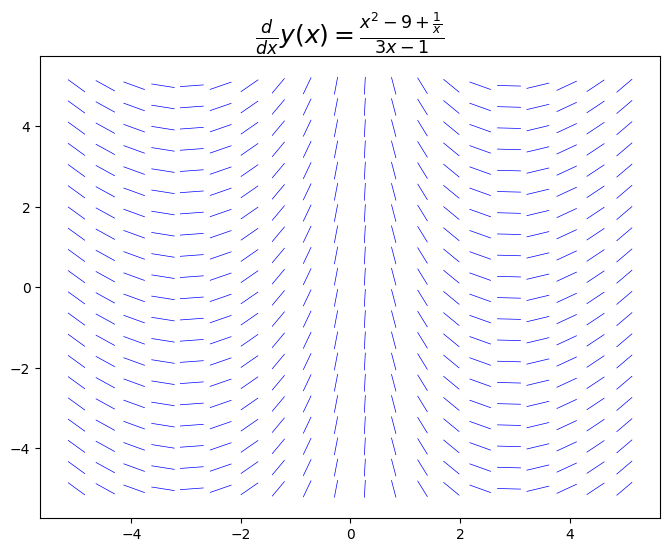

In [ ]:
# Defino incognitas
x = sympy.symbols('x')
y = sympy.Function('y')

# Defino la función
f = ((x**2-9)+1/x)/(3*x-1)

# grafico de campo de dirección
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
campo_dir = plot_direction_field(x, y(x), f, ax=axes)

# **Ejemplo 2.-** Hallar la solución a la siguiente ecuación diferencial ordinaria:

# $dy/dx=-(2xy^2+1)/2x^2y$

El procedimiento, es el mismo. Utilizamos “sympy.dsolve” para hallar la solución, la ecuación se igualó a 0 para introducirse.

In [ ]:
eq=(2*x*y(x)**2+1)/(2*x**2*y(x))
edo= sympy.Eq(y(x).diff(x)+eq,0)
edo

                2           
d          2⋅x⋅y (x) + 1    
──(y(x)) + ───────────── = 0
dx              2           
             2⋅x ⋅y(x)      

In [ ]:
# Resolviendo la ecuación
edo_sol=sympy.dsolve(y(x).diff(x) +(2*x*y(x)**2+1)/(2*x**2*y(x)))
edo_sol

⎡          ________            ________⎤
⎢       -╲╱ C₁ - x           ╲╱ C₁ - x ⎥
⎢y(x) = ────────────, y(x) = ──────────⎥
⎣            x                   x     ⎦

***Gráfico de campos de direcciones***



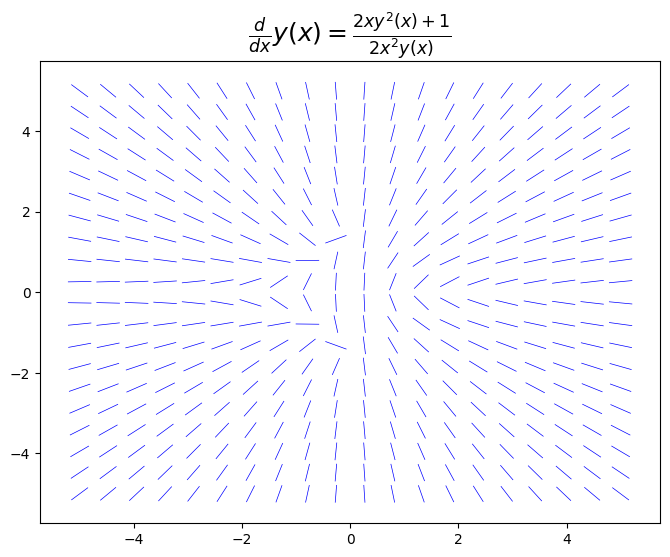

In [ ]:
# Defino incognitas
x = sympy.symbols('x')
y = sympy.Function('y')

# Defino la función
f = (2*x*y(x)**2+1)/(2*x**2*y(x))

# grafico de campo de dirección
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
campo_dir = plot_direction_field(x, y(x), f, ax=axes)

# **Ejemplo.-**

Hallar la solución a la siguiente ecuación diferencial de orden superior:

$y''+4y'+4y=0$

In [ ]:
eq=4*y(x).diff(x)+4*y(x)
edo= sympy.Eq(y(x).diff(x,2)-eq,0)
edo

                         2          
            d           d           
-4⋅y(x) - 4⋅──(y(x)) + ───(y(x)) = 0
            dx           2          
                       dx           

In [ ]:
# Resolviendo la ecuación
edo_sol=sympy.dsolve(y(x).diff(x,2) +4*y(x).diff(x)+4*y(x))
edo_sol

                    -2⋅x
y(x) = (C₁ + C₂⋅x)⋅ℯ    

In [ ]:
# Importando modulos necesarios
from sympy import *
init_printing() # imprimir con notación matemática.

# Defino las incognitas
x = symbols('x')
y = Function('y')

# Resolviendo ecuación diferencial
ed=Eq(y(x).diff(x,2) -4*y(x).diff(x)-4*y(x),0) #forma de escribir una derivada .diff(), pero si se quiere una de
# diferente grado es necesario poner .diff(variable a derivar, grado)
#Formar la ecuación se usa Eq de la paqueteria Equality
CI={y(0):1, y(x).diff().subs(x,0):0}

dsolve(ed,y(x),ics=CI)

       ⎛√2   1⎞  2⋅x⋅(1 - √2)   ⎛1   √2⎞  2⋅x⋅(1 + √2)
y(x) = ⎜── + ─⎟⋅ℯ             + ⎜─ - ──⎟⋅ℯ            
       ⎝4    2⎠                 ⎝2   4 ⎠              

**Campos de direcciones**

Los Campos de direcciones es una técnica sencilla pero útil para visualizar posibles soluciones a las ecuaciones diferenciales de primer orden. Se compone de líneas cortas que muestran la pendiente de la función incógnita en el plano
$x-y$. Este gráfico se puede producir fácilmente debido a que la pendiente de $y(x)$ en los puntos arbitrarios del plano $x-y$ está dada por la definición misma de la Ecuación diferencial ordinaria:

$dy/dx=f(x,y(x))$

Es decir, que sólo tenemos que iterar sobre los valores $x$ e $y$ en la grilla de coordenadas de interés y evaluar $f(x,y(x))$ para saber la pendiente de $y(x)$ en ese punto. Cuantos más segmentos de líneas trazamos en un Campo de dirección, más clara será la imagen. La razón por la cual el gráfico de Campos de direcciones es útil, es que las curvas suaves y continuos que son tangentes a las líneas de pendiente en cada punto del gráfico, son las posibles soluciones a la Ecuación diferencial ordinaria.

Por supuesto que calcular las pendientes y dibujar los segmentos de línea para un gran número de puntos a mano sería algo realmente tedioso, pero para eso existen las computadoras y Python!. Veamos un ejemplo, supongamos que tenemos la siguiente Ecuación diferencial ordinaria, la cual según lo que vimos más arriba, sabemos que no tiene una solución analítica:

$dy/dx=x^2+y^2−1$

entonces, con la ayuda de Python, podemos graficar su Campo de dirección del siguiente modo:

In [ ]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    """Esta función dibuja el campo de dirección de una EDO"""

    f_np = sympy.lambdify((x, y_x), f_xy, modules='numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)

    ax.axis('tight')
    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)

    return ax

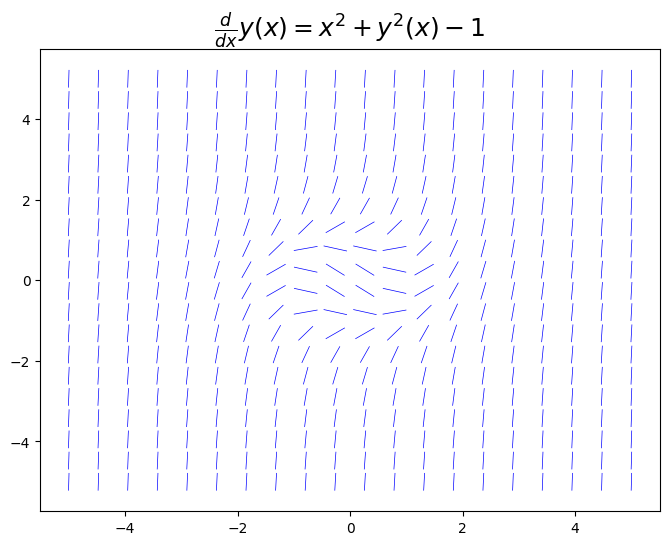

In [ ]:
# Defino incognitas
x = sympy.symbols('x')
y = sympy.Function('y')

# Defino la función
f = y(x)**2 +x**2-1

# grafico de campo de dirección
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
campo_dir = plot_direction_field(x, y(x), f, ax=axes)

Las líneas de dirección en el gráfico de arriba sugieren cómo las curvas que son soluciones a la Ecuación diferencial ordinaria se van a comportar. Por lo tanto, los Campos de direcciones son una herramienta muy útil para visualizar posibles soluciones para Ecuaciones diferenciales ordinarias que no se pueden resolver analíticamente. Este gráfico, también nos puede ayudar a determinar el rango de validez de la solución aproximada por la Serie de potencias. Por ejemplo si resolvemos nuestra EDO para la condición inicial $y(0)=0$, veamos a que conclusiones llegamos.

In [ ]:
# Defino incognitas
x = symbols('x')
y = Function('y')
eq=y(x)**2 +x**2-1
# definiendo la ecuación
ed=sympy.Eq(y(x).diff(x)-eq,0)
ed
CI= {y(0):0}
edo_sol=sympy.dsolve(ed,y(x),ics=CI)
edo_sol

TypeError: ignored

In [ ]:
edo_sol=sympy.dsolve(y(x).diff(x) - eq)
edo_sol

TypeError: ignored

<lambdifygenerated-27>:2: RuntimeWarning: divide by zero encountered in divide
  return -1/(x - 1)
<lambdifygenerated-29>:2: RuntimeWarning: divide by zero encountered in divide
  return -1/(x - 1)


TypeError: ignored

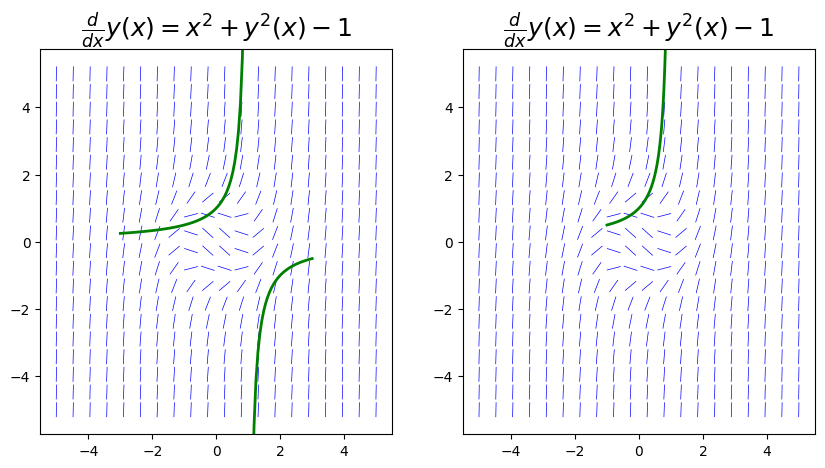

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# panel izquierdo - solución aproximada por Serie de potencias
plot_direction_field(x, y(x), f, ax=axes[0])
x_vec = np.linspace(-3, 3, 100)
axes[0].plot(x_vec, sympy.lambdify(x, edo_sol.rhs.removeO())(x_vec),'g', lw=2)

# panel derecho - Solución por método iterativo
plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, edo_sol.rhs.removeO())(x_vec),'g', lw=2)

# Resolviendo la EDO en forma iterativa
edo_sol_m = edo_sol_p = edo_sol
dx = 0.125

# x positivos
for x0 in np.arange(1, 2., dx):
    x_vec = np.linspace(x0, x0 + dx, 100)
    ics = {y(x0): edo_sol_p.rhs.removeO().subs(x, x0)}
    edo_sol_p = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, edo_sol_p.rhs.removeO())(x_vec),'r', lw=2)

# x negativos
for x0 in np.arange(1, 5, dx):
    x_vec = np.linspace(-x0-dx, -x0, 100)
    ics = {y(-x0): edo_sol_m.rhs.removeO().subs(x, -x0)}
    edo_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, edo_sol_m.rhs.removeO())(x_vec),'r', lw=2)

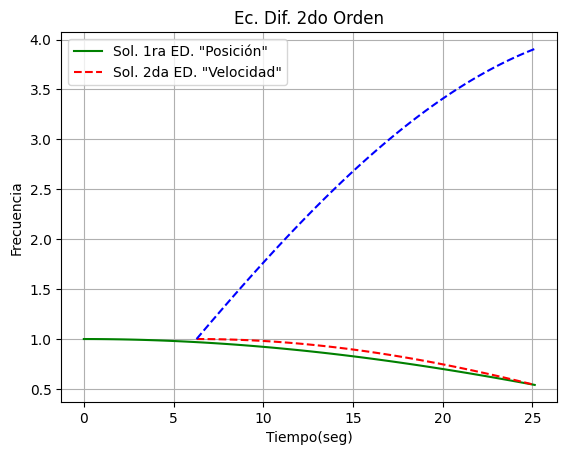

In [ ]:
import numpy as np #Libreria para dar sentido matemático
from math import pi
import matplotlib.pyplot as plt #Libreria que permite ver gáficos
from scipy import integrate #Permite resolver integrales

# Función cuadrática.
def f1(x):
    return np.cos(x)
# Función lineal.
def f2(x):
    return np.cos(x)+4*np.sin(x)

#Condición incial
x0=np.linspace(0*pi,8*pi,100)
x1=np.linspace(2*pi,8*pi,100)
x2=np.linspace(2*pi,8*pi,100)

# Configuración del gráfico
fig, axes=plt.subplots()
axes.plot(x0,f1(x),'g')
axes.plot(x2,f1(x),'--r')
axes.plot(x1,f2(x),'--b')

plt.title('Ec. Dif. 2do Orden')
plt.xlabel('Tiempo(seg)')
plt.ylabel('Frecuencia')
plt.legend(['Sol. 1ra ED. "Posición"','Sol. 2da ED. "Velocidad"'])
plt.grid( True )
plt.show()